__title__:    DATA 608 Spring 2017 HW 4  
__author__:   James Topor  
__date__:     March 16, 2017  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

The Python packages required for this notebook are loaded above. Before addressing the questions asked in the assignment, we'll load and inspect the data set and address any problematic aspects encountered therein.

In [2]:
# load river test data
rt = pd.read_csv('https://raw.githubusercontent.com/charleyferrari/CUNY_DATA608/master/lecture4/Data/riverkeeper_data_2013.csv')

# check content of data frame
rt.head()

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
0,Hudson above Mohawk River,10/16/2011,1733,1.5,35
1,Hudson above Mohawk River,10/21/2013,4,0.2,35
2,Hudson above Mohawk River,9/21/2013,20,0.0,35
3,Hudson above Mohawk River,8/19/2013,6,0.0,35
4,Hudson above Mohawk River,7/21/2013,31,0.0,35


A simple display of the first 5 records of the data set reveals no obvious issues. However, an examination of the data types of each column reveals a few potential areas of concern:

In [3]:
# check data types
rt.dtypes

Site                 object
Date                 object
EnteroCount          object
FourDayRainTotal    float64
SampleCount           int64
dtype: object

Both the Date and EnterCount fields appear to contain non-numeric (i.e., character) data. As such, the Date field will be converted to a valid Python "datetime" format while the EnteroCount field will be converted to a 'float' format. Converting the EnteroCount field to a 'float' format requires that we first convert the existing content to numeric while simultaneously purging any extraneous '<' or '>' characters that are encountered. The resulting numeric field is then converted to 'float' format.

We also remove any rows from the data set that contain 'NA' values before checking the results of the data type conversions.

In [4]:
# covert Date field to datetime
rt['Date'] = pd.to_datetime(rt['Date'], format='%m/%d/%Y')

# purge extraneous < and > characters from EnteroCount field
rt['EnteroCount'] = pd.to_numeric(rt['EnteroCount'], errors='coerce')
# convert EnteroCount to float
rt['EnteroCount'] = rt['EnteroCount'].astype(float)

# remove any rows that have NAs
rt = rt.dropna()

# check data types again
rt.dtypes

Site                        object
Date                datetime64[ns]
EnteroCount                float64
FourDayRainTotal           float64
SampleCount                  int64
dtype: object

With the re-formatting of the two fields complete, the data is now ready for use in answering the assignment questions.
_____

## Question 1

- *Create lists & graphs of the best and worst places to swim in the dataset.*

A list of the 10 best places to swim is gathered by identifying the 10 sites having the lowest average EnteroCount's:

In [5]:
# group by site while calculating the mean values of each numeric
rt_swim = rt.groupby('Site', as_index = False).mean().round(2)
# discard date and 4day vars and sort by EnteroCount ascending
rt_swim = rt_swim[['Site', 'EnteroCount']].sort_values(by = 'EnteroCount', ascending = True)

# display list of 10 best pkaces to swim
rt_swim.head(10)

,Site,EnteroCount
59,Poughkeepsie Drinking Water Intake,9.45
44,Marlboro Landing,16.47
60,Poughkeepsie Launch Ramp,17.68
42,Little Stony Point,20.03
17,Croton Point Beach,20.48
25,Fort Montgomery,22.12
14,Cold Spring Harbor,23.18
64,Stony Point mid-channel,23.46
72,West Point STP Outfall,26.88
32,Haverstraw Bay mid-channel,28.17


A list of the 10 worst places to swim is gathered by identifying the 10 sites having the highest average EnteroCount's:

In [6]:
# display list of 10 worst places to swim
rt_swim.tail(10).sort_values(by = 'EnteroCount', ascending = False)

,Site,EnteroCount
29,Gowanus Canal,1384.12
63,Saw Mill River,1055.70
70,Upper Sparkill Creek,818.60
39,Kingsland Pt. Park- Pocantico River,573.50
57,Piermont Pier,545.12
48,Newtown Creek- Metropolitan Ave. Bridge,537.30
47,Newtown Creek- Dutch Kills,529.68
66,Tarrytown Marina,529.57
45,Mohawk River at Waterford,512.03
53,Orangetown STP Outfall,508.60


A horizontal bar plot of the 10 best places to swim is generated as follows:

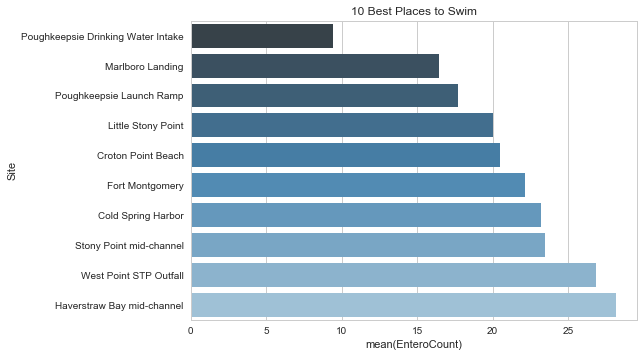

In [7]:
# now plot graphics for each
best = rt_swim.head(10)

sns.set_style("whitegrid")
sns.plt.title('10 Best Places to Swim')
ax = sns.barplot(x="EnteroCount", y="Site", palette="Blues_d", data = best)
plt.show()

A horizontal bar plot of the 10 worst places to swim is generated in a similar fashion:

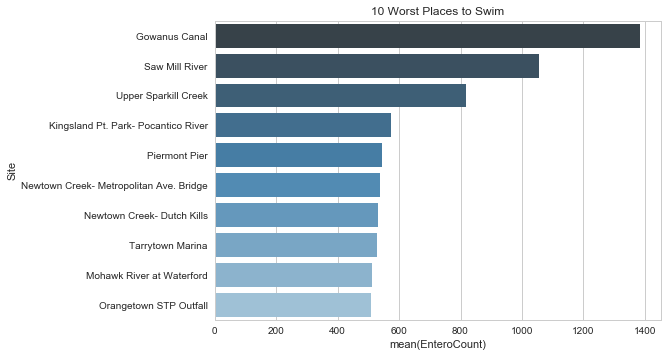

In [8]:
worst = rt_swim.tail(10).sort_values(by = 'EnteroCount', ascending = False)

sns.set_style("whitegrid")
sns.plt.title('10 Worst Places to Swim')
ax = sns.barplot(x="EnteroCount", y="Site", palette="Blues_d", data = worst)
plt.show()

_____

## Question 2

- *The testing of water quality can be sporadic. Which sites have been tested most regularly? Which ones have long gaps between tests? Pick out 5-10 sites and visually compare how regularly their water quality is tested.*

We can identify the 10 most tested sites by simply counting the number of dates on which each site had a water quality test:

In [9]:
# get the count of number of tests at each site - use date field as indicator
# of when test was conducted
most_samp = rt[['Site', 'Date']].groupby('Site').size()

# convert python series to data frame
most_samp = pd.DataFrame({'Site':most_samp.index, 'TestCount':most_samp.values})

# display 10 most frequently tested sites
most_samp.sort_values(by = 'TestCount', ascending = False).head(10)

,Site,TestCount
57,Piermont Pier,165
70,Upper Sparkill Creek,143
0,125th St. Pier,54
53,Orangetown STP Outfall,48
63,Saw Mill River,46
52,Nyack Launch Ramp,46
48,Newtown Creek- Metropolitan Ave. Bridge,43
40,Kingston Point Beach,42
61,Rondout- Eddyville Anchorage,42
30,Harlem River- Washington Bridge,40


We can identify the 10 least frequently tested sites in a similar manner:

In [10]:
# display 10 least frequently tested sites
most_samp.sort_values(by = 'TestCount', ascending = True).head(10)

,Site,TestCount
37,Irvington Beach,16
66,Tarrytown Marina,21
65,TZ Bridge mid-channel,23
32,Haverstraw Bay mid-channel,23
64,Stony Point mid-channel,24
56,Pier 96 Kayak Launch,24
39,Kingsland Pt. Park- Pocantico River,24
22,Emeline Beach- Haverstraw,24
74,Yonkers mid-channel,24
29,Gowanus Canal,25


We can generate a horizontal bar plot for the 10 most frequently tested sites as follows:

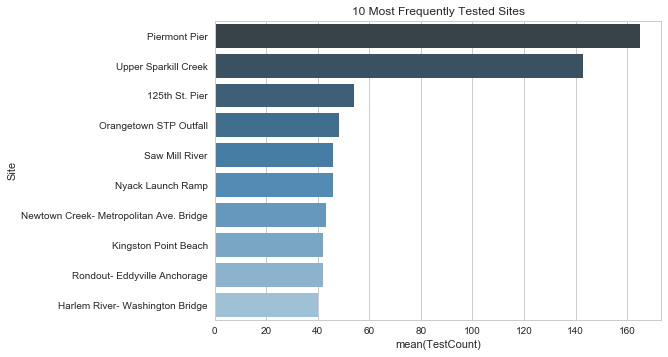

In [11]:
# now plot graphics of most and least frequently tested sites 
most = most_samp.sort_values(by = 'TestCount', ascending = False).head(10)

sns.set_style("whitegrid")
sns.plt.title('10 Most Frequently Tested Sites')
ax = sns.barplot(x="TestCount", y="Site", palette="Blues_d", data = most)
plt.show()

A horizontal bar plot for the 10 least frequently tested sites is generated in a similar manner:

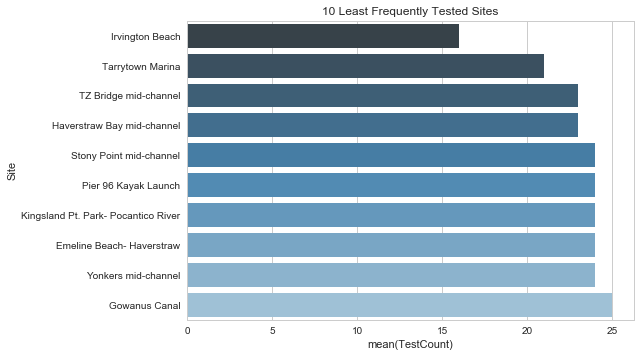

In [12]:
least = most_samp.sort_values(by = 'TestCount', ascending = True).head(10)

sns.set_style("whitegrid")
sns.plt.title('10 Least Frequently Tested Sites')
ax = sns.barplot(x="TestCount", y="Site", palette="Blues_d", data = least)
plt.show()

Finally, we can visually compare the 3 most frequently tested and 3 least frequently tested sites to see whether there is a
noticeable difference in how often they are tested. A strip plot is generated which displays the site visit histories for each of those six sites during the time period covered by the data set:

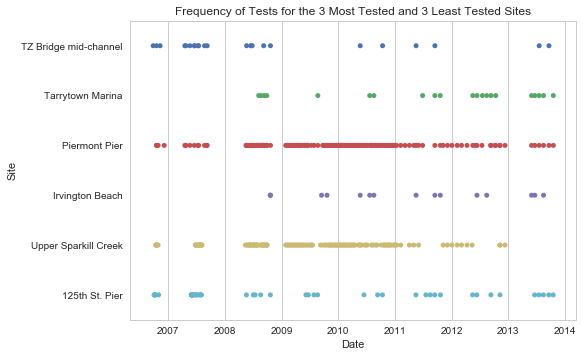

In [13]:
# Get names of 3 most tested sites
gaps = most.head(3)['Site']

# Get names of 3 least visited sites
least.head(3)['Site']

# concatenate the 2 lists
gaps = gaps.append(least.head(3)['Site'])

# now get sample dates for each site
g_alldat = rt.loc[rt['Site'].isin(gaps.values)][["Site", "Date"]]

# generate a single strip plot displaying site visit histories for all 6 sites
sns.plt.title('Frequency of Tests for the 3 Most Tested and 3 Least Tested Sites')
ax = sns.stripplot(x="Date", y="Site", data=g_alldat)
plt.show()

The strip plot clearly shows that the three least visited sites (Tarrytown Marina, Irvington Beach, and TZ Bridge mid-channel) are visited far less frequently than are the three most visited sites. 
_____

## Question 3

- *Is there a relationship between the amount of rain and water quality? Show this relationship graphically. If you can, estimate the effect of rain on quality at different sites and create a visualization to compare them.*

One possible method of examining the relationship between the amount of rain and water quality is to fit a linear regression model to the 'FourDayRainTotal' and 'EnteroCount' variables. Before attempting to fit such a model we first examine the distributions of the variables 'FourDayRainTotal' and 'EnteroCount':

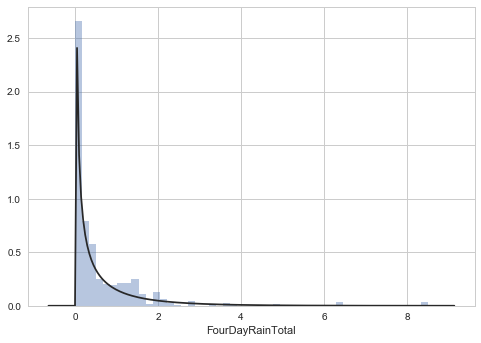

In [14]:
sns.distplot(rt.FourDayRainTotal, kde=False, fit=stats.gamma)
plt.show()

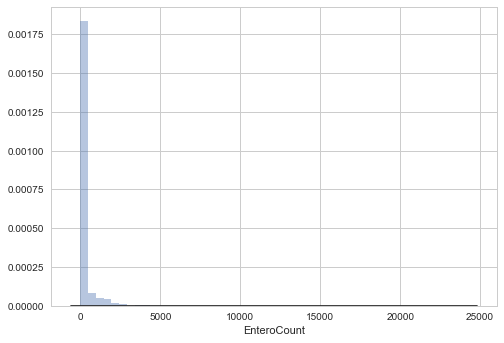

In [15]:
sns.distplot(rt.EnteroCount, kde=False, fit=stats.gamma)
plt.show()

As we can see in the plots shown above, both distributions are heavily right-skewed. Since heavily skewed distributions can be problematic for purposes of linear model fitting, we can attempt to normalize each distribution by applying a log10 transform to each:

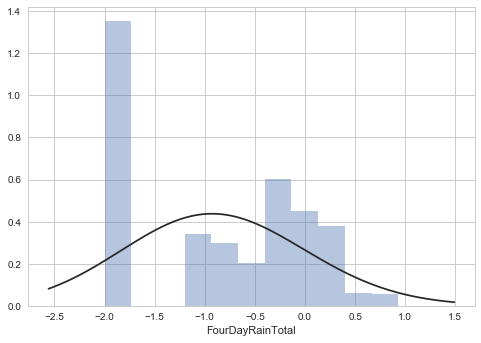

In [16]:
sns.distplot(np.log10(rt.FourDayRainTotal + .01), kde=False, fit=stats.gamma)
plt.show()

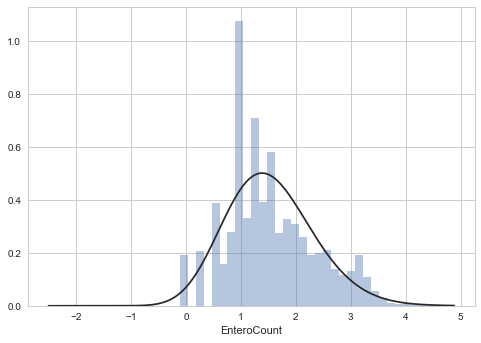

In [17]:
sns.distplot(np.log10(rt.EnteroCount + .01), kde=False, fit=stats.gamma)
plt.show()

The transformed distributions do appear to be more normally distributed than were the originals. The transformed 
FourDayRainTotal variable shows strong evidence of being zero-inflated, as evidenced by the bifurcated nature of the plot
shown above. However, the log transformed variables are likely sufficient for our use. 

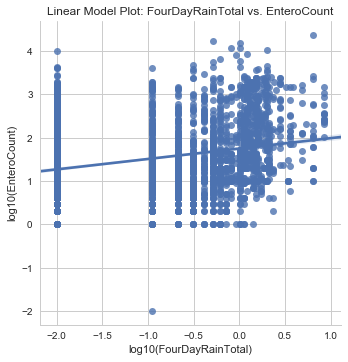

In [18]:
lm_df = pd.DataFrame({'FourD': np.log10(rt.FourDayRainTotal + .01), 
                      'EnteroCount': np.log10(rt.EnteroCount + .01)})

ax = sns.lmplot("FourD", "EnteroCount", data = lm_df )
ax.set(xlabel='log10(FourDayRainTotal)', ylabel='log10(EnteroCount)')
sns.plt.title('Linear Model Plot: FourDayRainTotal vs. EnteroCount')
plt.show()

The plot above shows that there appears to be a relationship between rain fall totals and water quality. Specifically, the larger the rainfall amount, the lower the water quality is likely to be. This makes sense from an intuitive perspective since we should expect relatively large amounts of rain to result larger amounts of pollutants flowing into the Hudson River as a result of naturally occurring runoff processes. 

Finally, we can estimate the effect of rain on quality at different sites and create a visualization to compare them. We'll again select the three most tested and three least tested sites and plot linear models for each

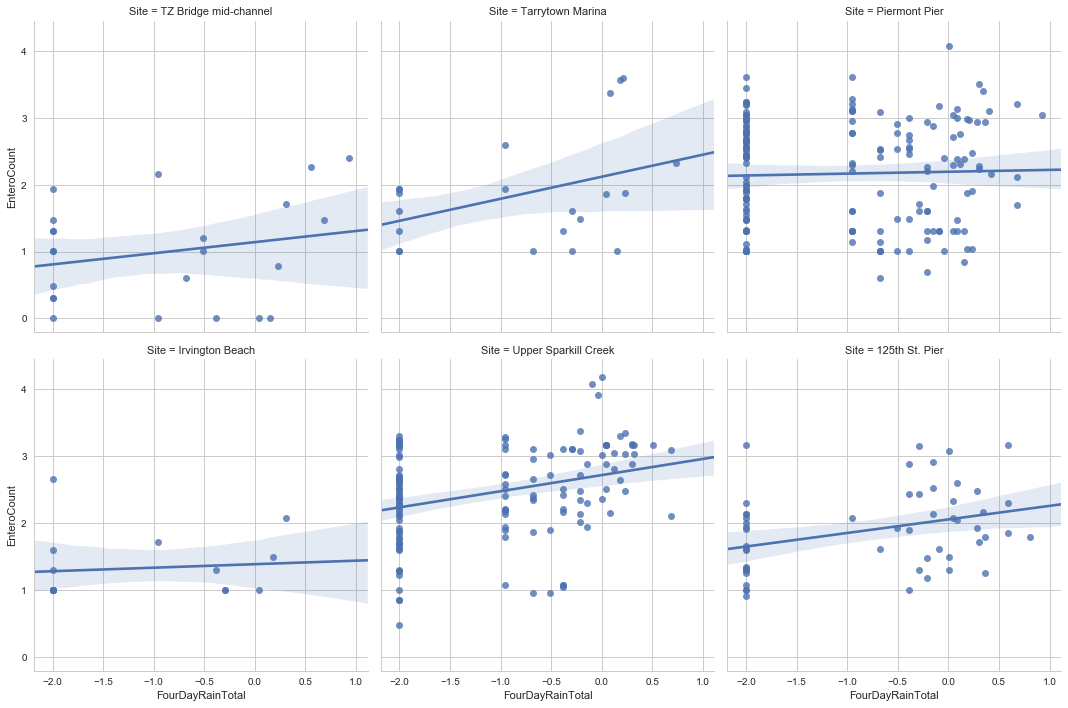

In [19]:
m_sites = rt.loc[rt['Site'].isin(gaps.values)][["Site", "EnteroCount", "FourDayRainTotal"]]

# log transform the variables before plotting
m_sites.EnteroCount = np.log10(m_sites.EnteroCount + .01)
m_sites.FourDayRainTotal = np.log10(m_sites.FourDayRainTotal + .01)

sns.lmplot("FourDayRainTotal", "EnteroCount",  col="Site", col_wrap=3, data=m_sites)
plt.show()

Each of the plots above appears to confirm the relationship previously identified between rainfall amounts and water quality.  In each plot we see evidence of higher rainfall totals being associated with relatively lower water quality. In other words, we should expect to find higher EnteroCount values (and hence lower water quality) whenever relatively large amounts of rainfall occur. Furthermore, the plots show that some locations may be more sensitive to rainfall runoff than others. For example, we can clearly see that quality of water at Upper Sparkill Creek is more adversely effected by high rainfall amounts than is Irvington Beach.